# Propagation Malware in Wireless Systems: A variation of the SIR Model (SEIRV) 

### Abstract:

In this study, we set out to create an SEIRV Model that models propagation of malware in wireless systems. The goal is to run simulations of the dynamical system for arbitrary lengths of time. Malware Propagation Models have previously been used to characterize the behavior of the network compartments with passage of time; This is what we'll do here through simulation. We will model this problem using a discrete time dynamical system as it will serve as an approximation to the continuous dynamical system. Python and Euler's Method are used to create and run the simulations for this problem. Ultimately, we seek to demonstrate the effect that the timestep, Δ𝑡, has on the simulation; Particularly, the effect of a 10%, 50%, and 100% increase in the timestep. We expect that a large increase in the timestep will produce a delay that will cause the simulation to fail to mimic its original characteristics (chaos).


### Introduction

Malware, or malicious software, is commonly used to cause damage to computers, servers, and computer networks; You can think of it as a disease that afflicts computers. This resemblance is why researchers, scientists, and the like create malware analysis models using network compartments (w/ the passage of time) and dynamical systems. This particular model, the SEIRV Model, is a 5-compartment model. We will run simulations given a set of default parameters and initial values, then determine how different time-steps (Δ𝑡) affect the simulations overall. We will determine how much larger the time-step must become before our system stops mimicking the original system characteristics (and we introduce chaos).

### Assumptions/Definitions:


**State Variables:**

* $\text{S(t) = Susceptibles}$
* $\text{E(t) = Exposed (latent)}$
* $\text{I(t) = Infectious}$ 
* $\text{R(t) = Recovered (temporarily immune)}$
* $\text{V(t) = Vaccinated (immunized)}$
* $\text{N(t) = Total Population (sum of all the above)}$

**Parameters:**

* $\sigma = \text{Distribution Density}$
* $r = \text{transmission range}$
    * $\sigma \pi r_0^2 = \text{effective contact with an infected node for the transfer of infection}$


* $\lambda = \text{inclusion rate of new nodes into the network}$

* $\beta = \text{infection contact rate}$

* $\tau = \text{Death Rate of the nodes due to hardware or software failure}$

* $\omega = \text{Crashing rate due to attack of malicious objects (a worm in this case)}$

* $\theta = \text{Rate at which exposed nodes become infectious}$

* $\nu = \text{Rate of recovery}$

* $\phi = \text{Rate at which recovered nodes become susceptible to infection}$

* $\rho = \text{Rate of vaccination for susceptible sensor nodes}$

* $\xi = \text{Rate of transmission from the Vaccinated compartment to the Susceptible Compartment}$

**Assumptions:** 

***For our model, we'll assume the following:***

* $S = 100; \space E = 3; \space I = 1; \space R = 0; \space V = 0$


* $\lambda = 0.33; \space \beta = 0.1; \space \tau = 0.003; \space \omega = 0.07; \space \theta = 0.25$


* $\nu = 0.4; \space \phi = 0.3; \space \rho = 0.3; \space \xi = 0.06; \space \sigma = 0.5; \space r_0 = 2 \text{ meters}$


* $\frac{dS}{dt} = \lambda - \beta SI \sigma \pi r_0^2 - \tau S - \rho S + \phi R + \xi V$

* $\frac{dE}{dt} = \beta SI \sigma \pi r_0^2 - (\tau + \theta)E$

* $\frac{dI}{dt} = \theta E - (\tau + \omega +\nu)I$

* $\frac{dR}{dt} = \nu I - (\tau + \phi)R$

* $\frac{dV}{dt} = \rho S - (\tau + \xi)V$


* $S, E, I, R, V \geq 0$

**Assumptions: Compartment Model Image**

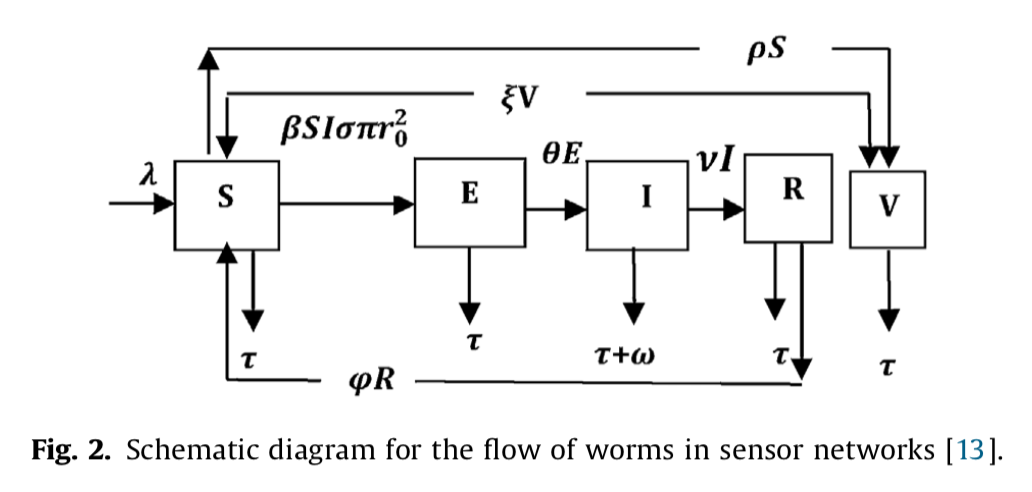

In [1]:
from IPython.display import Image as i
i(filename='/Users/Chris/Desktop/Images/Compartment.png', height= 1000, width= 400)

### Analysis:

**Modeling Approach:**

* The network system was modeled as a discrete dynamical system, a system of difference equations. This dynamical system consisted of five state variables: $S, E, I, R, V$.


* The state space is shown below: $$\space$$ $$S = \{(S, E, I, R, V): S \geq 0, E \geq 0, I \geq 0, R \geq 0, V \geq 0\}$$ $$\space$$ 

* Given that $\Delta t$ is relatively small, we can simulate a continuous dynamical system of differential equations w/ a discrete dynamical system of difference equations $\Big(\frac{dx}{dt} \approx \frac{\Delta x}{\Delta t}\Big)$. The system of five difference equations is also shown below: 

$$\frac{\Delta S}{\Delta t} = \lambda - \beta SI \sigma \pi r_0^2 - \tau S - \rho S + \phi R + \xi V$$
$$\frac{\Delta E}{\Delta t} = \beta SI \sigma \pi r_0^2 - (\tau + \theta)E$$
$$\frac{\Delta I}{\Delta t} = \theta E - (\tau + \omega +\nu)I$$
$$\frac{\Delta R}{\Delta t} = \nu I - (\tau + \phi)R$$
$$\frac{\Delta V}{\Delta t} = \rho S - (\tau + \xi)V$$

* Euler's Method was used to simulate this Discrete Dynamical System: $x_{n+1} = x_n + \Delta t * 0.5x_n (1-x_n)$.

* Python was used to create/run the simulations.


* The simulations, in the context of the problem, show that there will be an immediate spike in Exposed, Infected, Recovered, and Vaccinated following by a decrease working nodes in each compartment. What this seems to indicate is that virus still persists and will continue to until all nodes in the system are destroyed. 


* The simulations show no significant change between the original, the 10% increase, and the 50% percent increase in time. However, as we do a 100% increase (doubling our time step) we start to see our model fail to resemble the original model.

### Code 

```python
# Initial Conditions
L = [[0, S, E, I, R, V]]
    
# Euler's Implementation
for i in range(N):
    t_last, S_last, E_last = L[-1][0], L[-1][1], L[-1][2] 
    I_last, R_last, V_last = L[-1][3], L[-1][4], L[-1][5]
    t_next = t_last + delT
    S_next = S_last + (delT * deltaS(S_last, E_last, I_last, R_last, V_last))
    E_next = E_last + (delT * deltaE(S_last, E_last, I_last, R_last, V_last))
    I_next = I_last + (delT * deltaI(S_last, E_last, I_last, R_last, V_last))
    R_next = R_last + (delT * deltaR(S_last, E_last, I_last, R_last, V_last))
    V_next = V_last + (delT * deltaV(S_last, E_last, I_last, R_last, V_last))
    L.append([t_next, S_next, E_next, I_next, R_next, V_next])
```

In [2]:
import matplotlib.pyplot as plt
import math as m
import numpy as np

In [3]:
def plot_simulation(S, E, I, R, V, lmbda= 0.33, beta= 0.1, sigma= 0.5, 
                    tau= 0.003, omega= 0.07, theta= 0.25, nu= 0.4, 
                    phi= 0.3, rho= 0.3, xi= 0.06, r0= 2, delT= 0.1, N = 5):

    # Dynamical System
    deltaS = lambda S, E, I, R, V: lmbda - beta*S*I*sigma*m.pi*r0**2 - tau*S - rho*S + phi*R + xi*V
    deltaE = lambda S, E, I, R, V: beta*S*I*sigma*m.pi*r0**2 - (tau + theta)*E
    deltaI = lambda S, E, I, R, V: theta*E - (tau + omega + nu)*I
    deltaR = lambda S, E, I, R, V: nu*I - (tau + phi)*R 
    deltaV = lambda S, E, I, R, V: rho*S - (tau + xi)*V
    
    # Sets up the Figure
    fig, ax = plt.subplots()
    
    # Initial Conditions
    L = [[0, S, E, I, R, V]]
    
    # Euler's Implementation
    for i in range(N):
        t_last, S_last, E_last = L[-1][0], L[-1][1], L[-1][2] 
        I_last, R_last, V_last = L[-1][3], L[-1][4], L[-1][5]
        t_next = t_last + delT
        S_next = S_last + (delT * deltaS(S_last, E_last, I_last, R_last, V_last))
        E_next = E_last + (delT * deltaE(S_last, E_last, I_last, R_last, V_last))
        I_next = I_last + (delT * deltaI(S_last, E_last, I_last, R_last, V_last))
        R_next = R_last + (delT * deltaR(S_last, E_last, I_last, R_last, V_last))
        V_next = V_last + (delT * deltaV(S_last, E_last, I_last, R_last, V_last))
        L.append([t_next, S_next, E_next, I_next, R_next, V_next])
   
    
    L = np.array(L)

    # Plots the Dynamical System against time.
    ax.plot(L[:,0], L[:,1], c= 'b', label= 'Susceptibles')
    ax.plot(L[:,0], L[:,2], c= 'r', label= 'Exposed')
    ax.plot(L[:,0], L[:,3], c= 'g', label= 'Infected')
    ax.plot(L[:,0], L[:,4], c= 'k', label= 'Recovered')
    ax.plot(L[:,0], L[:,5], c= 'y', label= 'Vaccinated')
    ax.set(xlabel= 'Time (t)', ylabel='Population [f(t)]', title= 'Discrete Approximation')
    ax.legend(loc= 'best')

#### Figure 1: $\Delta t = 0.1$

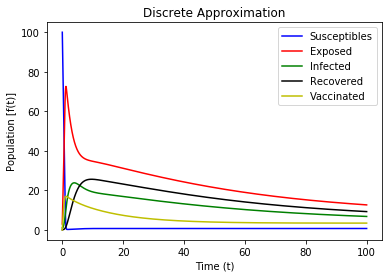

In [4]:
plot_simulation(100, 3, 1, 0, 0, N= 1000)

#### Figure 2: $\Delta t = 0.11$

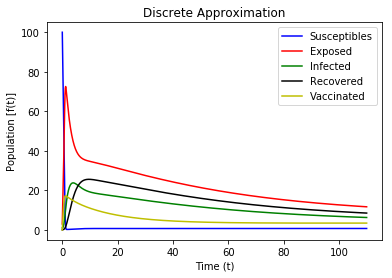

In [5]:
plot_simulation(100, 3, 1, 0, 0, delT= 0.11, N= 1000)

#### Figure 3: $\Delta t = 0.15$

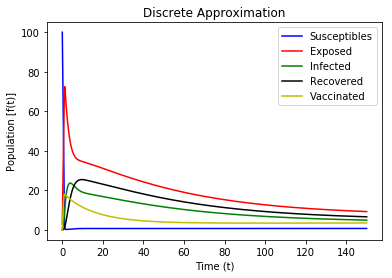

In [6]:
plot_simulation(100, 3, 1, 0, 0, delT= 0.15, N= 1000)

#### Figure 4: $\Delta t = 0.2$

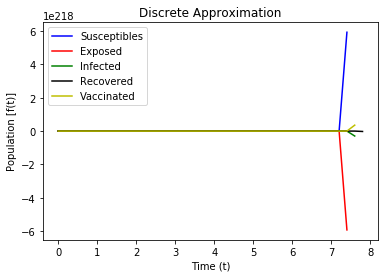

In [7]:
plot_simulation(100, 3, 1, 0, 0, delT= 0.2, N= 1000)

### Interpretations and Conclusions:

* Based on the result from Figures 1 - 4 of the SEIRV Compartment Simulations, we can verify that we can model continuous dynamical systems w/ discrete ones given that our time step is small enough; $\cfrac{dx}{dt} \approx \cfrac{\Delta x}{\Delta y}$ given that $\Delta t$ is small enough. This is verified w/ the simulations as it isn't until $\Delta t$ is twice as large that we begin to see the model failing to look like the original system.      